Documentation

# Scope of Project

Winning or Losing bets placed on sporting events is often chalked up to good or bad luck, however, given there is an abundance of data on teams, can the "good luck" be increased by using the data to build a predictive model? That is what I set out to achieve. I focused my Capstone project with the goal of achieving a predicitve model that could achieve over a 50% winning algortihim for correctly predicitng the winning team, and whether the home team would win or lose the betting spread. I focused specifcially on American college football games within the SEC conference, using the data available from games since 2004. 


# Data

The following datasets were manually collected for each team within the SEC conference (no API available) and used for this project:

* ESPN team season stats (example: https://www.espn.com/college-football/team/schedule/_/id/333/season/2021 )
* ESPN individual game stats (example: https://www.espn.com/college-football/matchup?gameId=401282154)
* Betting Odds (example: https://www.oddsshark.com/stats/dbresults/football/ncaaf )

# Method

Building a DataFrame to incorporate the information gathered from each datset with a row for every game, with home team and away teams stats in the columns was extensive. Below is an overview of the process:

1) Scrapped data and placed data from each datset into seperate sheets within excel (used Excel Macro to assist)

2) Uploaded data into Jupyter and manually cleaned and processed each dataset seperately before merging together

3) Merged datset together with core data points on each team (home and away) for every game (approx 100 columns)

4) Manipulated core data to create rolling stats for past home and away games,as well as rolling away/home game 
exclusive stats for each team respectively. I was curious if a teams past home & away stats or just their past home or away (depedning on whethere they were the home or away team) stats might be better predictive data to use or if the past home & away stats would perfrom better. (e.g. Home Team's past 5 Home & Away games rolling average score, Away Team's past 3 Away games rolling minimum score, Past Home Team's Home score, etc). This created over 1,500 columns. 

5) Created a target variables, Winning Team (Home or Away team), as well as the Home Spread Outcome (Win, Lose, Push)

6) To filter the columns down to the ones that were most useful to building a predictive model, I ran correlation tests on all variables with home and away score to determine most predicitve variables to use in model. 

7) I then removed the rudundant varibales (e.g Removed Total past 5 game rolling scores and kept Avg past 5 game rolling score) and took the difference in stats between each team. This filtered the columns, thus removing dimensionality, and ending with 13 columns to use to predict the target variable. 

8) Ran three classification models, KNN, Decision Tree, and Random Forest. 

9) Utilized Gridsearch to Tune Hyperparameters

10) Compared final model results

11) Re-tested Models performance using both indiviudal team stats on high correlation variables (as opposed to taking difference in stats)

12) Re-tested Models performance using only Home Team stats (removing away team stats entirely with the exception of ranking and away team spread columns)

13) Selected Final Model based on best balanced f1 accuracy score. 

# Data Cleaning

The cleaning phase was extensive, below is a brief overview of some of the major steps taken:

1) Removed non-SEC games

2) Corrected names of teams given the sportsOdds dataset had mulitple possible abbreviations for each team name 

3) Filled in Null values with the columns mean values

4) Corrected typos or removed columns from raw data containing irrelevant information

5) Seperated ranking information from the team name 

6) Seperated indiviudal player stats from thier name

7) Seperated win loss record into indiviudal season and conference win/loss columns 

8) Created percenatges for relavant columns (e.g. pass attempts & pass completions became completion %)

9) Relabled "vs" or "@" to identify Home and Away team

10) Seperated score value to identify Home score and away score

11) Altered possession time from 32:28 minutes format to 32.47 mins.

12) Removed empty space in columns (stripped) 

13) Identified the winning and losing team of each game



# EDA

Analyzed the average score of each team vs all opponents to see if there were any visible trends. Example below

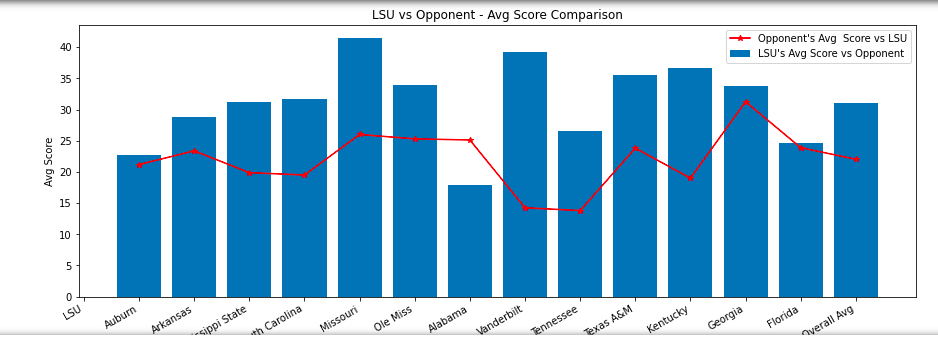



Created box plot of each indvudal team's home and away score ranges. 

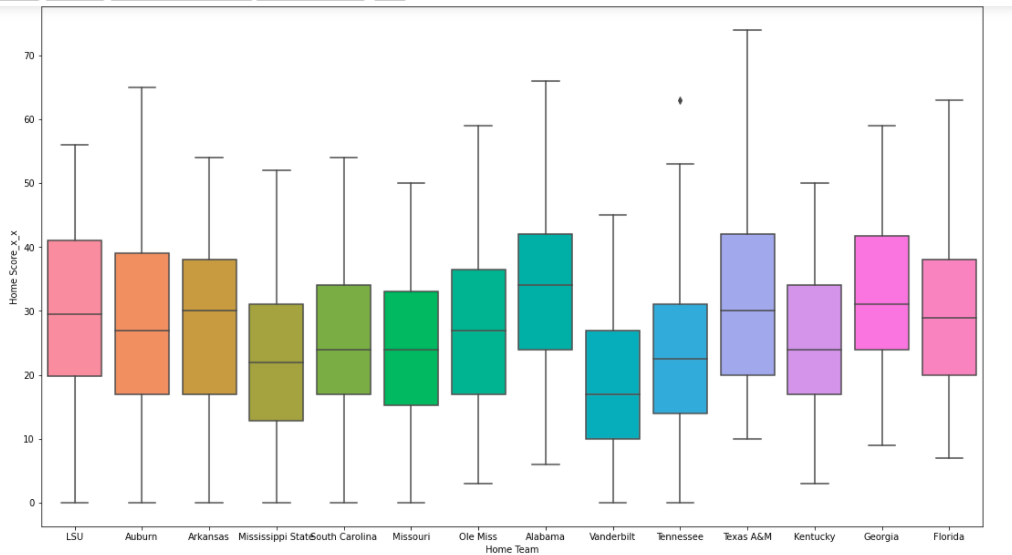

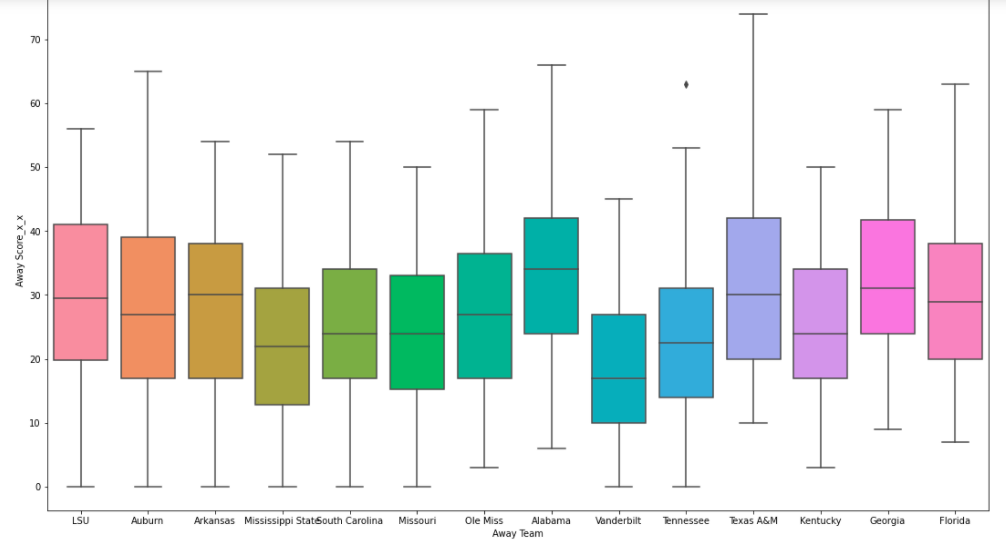

Ran Permutation Test to determine if Home Team had an advanatage - Results conlcluded that they have a 3 point advanatge

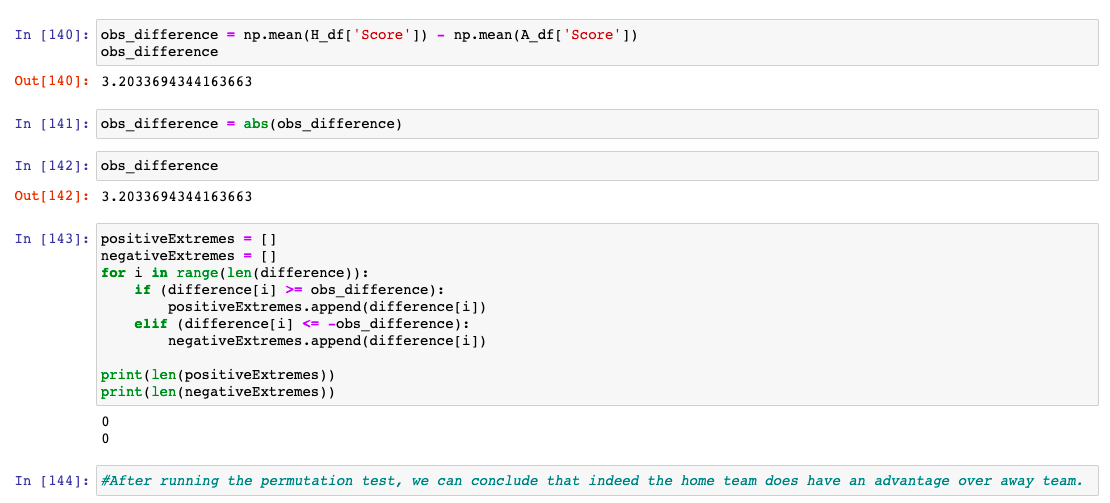

Created Histogram plots to showcase the distribution of home and away score

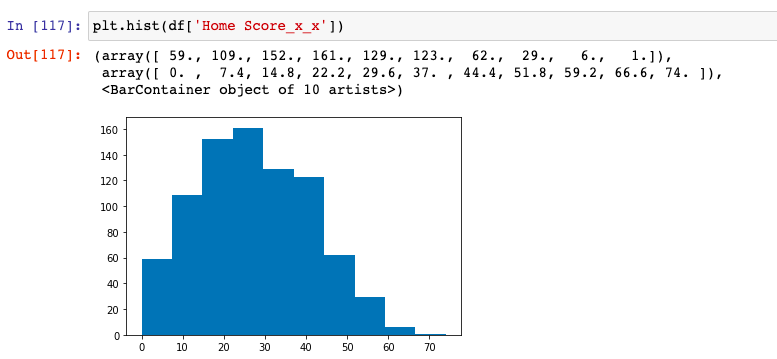

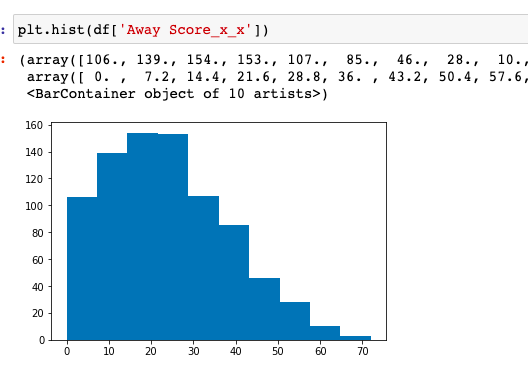

Evaluated the home team and away team wins 

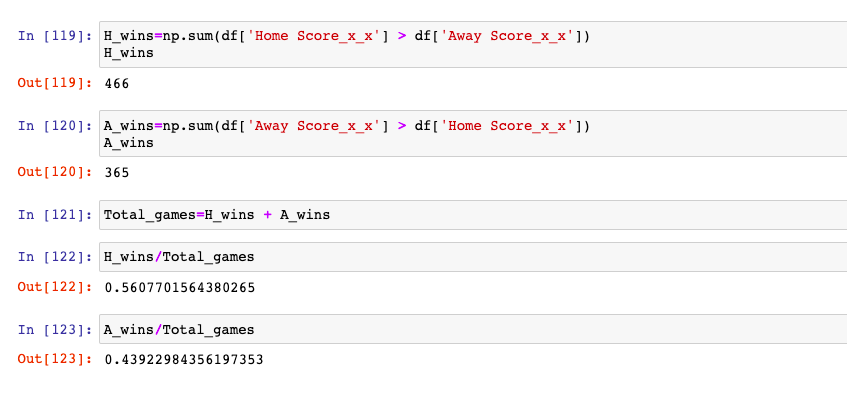

Checked datasets distribution by year of games where the score is actually over or under the betting odds Over/under. (Pos=Over, Neg=Under, Push=Tie)

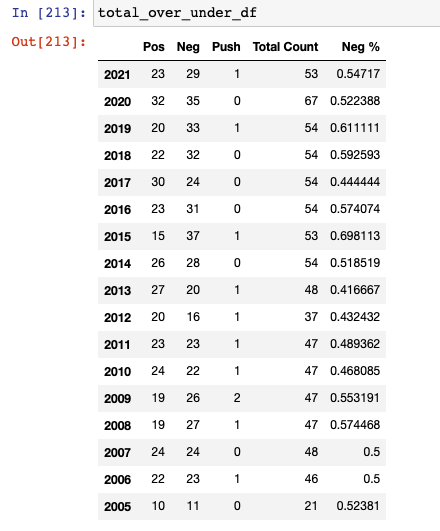

Checked the distribution of the difference between the total score and the Total score betting odds - the mean is a difference of -.36 , meaning the average games actual score is fairly close to the actual score 

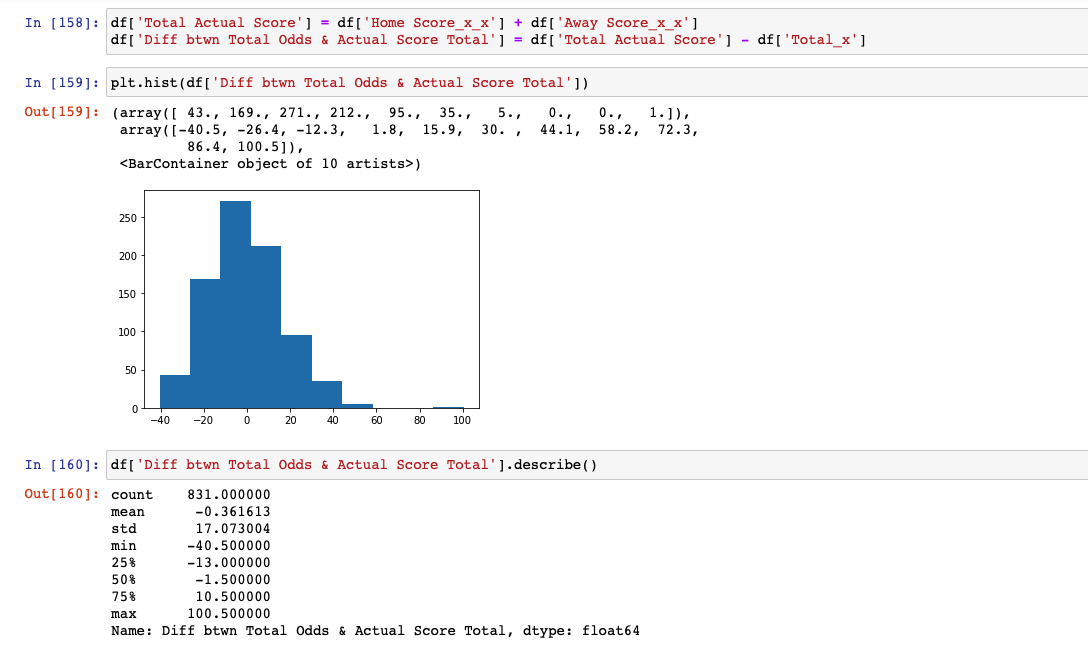

Checked to see how often the lower ranked team wins (when there is at least one team ranked)

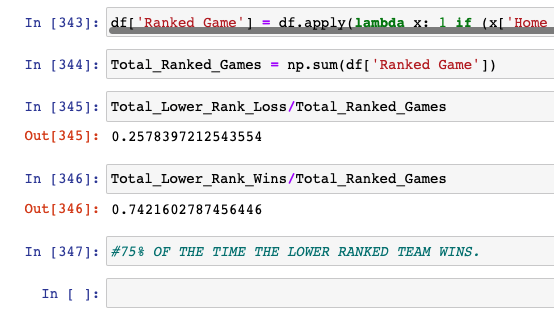

# Pre-Processing

*Created Target Variable (H Spread Outcome) - Did the home team win, lose, tie the spread?

*Ran Correlation with Actual Home Score Values to determine the most correlated variables to use

*Filtered the variables down to only the most correlated (above .25 correlation score)

*Double checked the data to determine the amount of outliers for each column of data

*Double checked the game distribution between teams (Home games and Away game matchups) to ensure even distribution

*Dropped columns that may overcomplicate the model (Team name, Year, Date)

*Ensured all final data was available at the start of each game

*Setup Train_Test_Split in prepartion to start modeling. 

# Modeling Process Overview


Initally the modeling was constructed around taking the variables with the highest correlation values to the Home and Away Scores, then taking the difference in those stats between the Home and Away Team Stats as the final model variables. This was to reduce the dimensionality and thought this method would produce the best model results. After running each of the models (listed below) on two different target variables (H Spread Outcome and Home/Away Winner), I utilized GridSearch to help tune the parameters to boost the models performance. Afterwards, I re-ran the models for each target variable using the home and away team high correlation stats (as opposed to difference in stats), and then re-ran again using only the home team high correlation variables. 


Home/Away Difference in High Correlation Stats Models 

    X Variables
       [ 'Home Team Spread_x',
          'Total_x',
          'Rolling_5_Game_Score_Avg_Diff',
          'Rolling_5_Game_1stDowns_Avg_Diff',
          'Rolling_5_Game_Total_Yards_Avg_Diff',
          'Rolling_5_Game_YardsperPass_Avg_Diff',
          'Rolling_5_Game_Spread_Avg_Diff',
          'Rolling_5_Game_Conf_Wins_Diff',
          'Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff',
          'Rolling_5_Game_Completion%_Avg_Diff',
          'Rolling_5_Game_Ranking_Avg_Diff',
          'Away Team Ranking_x',
           'Home Team Ranking_x',
           'H/A Winner']

    Models Used
        * K Nearest Neighbors Classifier (KNN)
        * Decision Tree Classifier (DT)
        * Random Forest Classifer (RF)
        * Support Vector Machine (SVM)

       
    Best Models
       * Predictive Variable = Home Spread Outcome 
           * Random Forest - f1_weighted accuracy = 50%
           
       * Predictive Variable = Home/Away Winner
           * Random Forest - f1_weighted accuracy = 72%
           
Home & Away Team High Correlation Stats

    X Variables
       ['Home Team Spread_x', 'Away Team Spread_x', 'Total_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
       'Rolling 5 Past H&A Spread Avg_Away_Team',
       'Rolling 5 Past H&A Spread Min_Away_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Away_Team',
       'Rolling 5 Past H&A Conf T Wins_Away_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team',
       'Rolling 5 Past H&A Completion % Avg_Away_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Away_Team',
       'Rolling 5 Past H&A Ranking Avg_Away_Team',
       'Rolling 5 Past H&A Season T Losses_Home_Team', 'Home Team Ranking_x',
       'Away Team Ranking_x', 'Previous H&A Ranking_Home_Team',
       'Previous H&A Ranking_Away_Team']
    
    Models Used 
        * K Nearest Neighbors Classifier (KNN)
        * Decision Tree Classifier(DT)
        * Random Forest Classifier(RF)
        
    Best Models 
        * Predictive Variable = Home Spread Outcome 
            *Random Forest - balanced f1_accuracy = 49%
        * Predictive Variable = Home/Away Winner
            Random Forest - balanced f1_accuracy = 74.4%
            
Home Team High Correlation Stats

    X Variables
       ['Home Team Spread_x', 'Away Team Spread_x', 'Total_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Home_Team', 'Home Team Ranking_x',
       'Away Team Ranking_x', 'Previous H&A Ranking_Home_Team']
     

    Models Used 
        * K Nearest Neighbors Classifier (KNN)
        * Decision Tree Classifier (DT)
        * Random Forest Classifier (RF)
    Best Models
        * Predictive Variable = Home Spread Outcome 
            *Random Forest - balanced f1_accuracy = 56.3%
        * Predictive Variable = Home/Away Winner
            Random Forest - balanced f1_accuracy = 77.5%
            
    
    



# Documentation 

# Pre-Processing

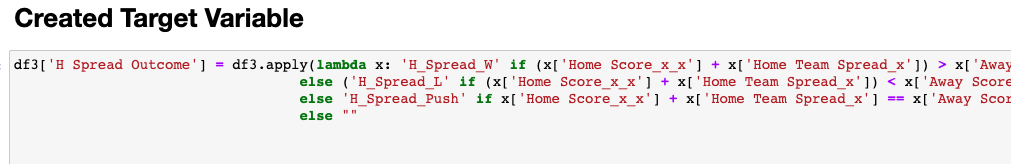

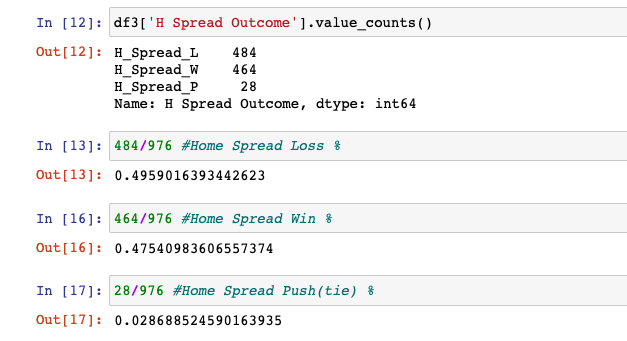

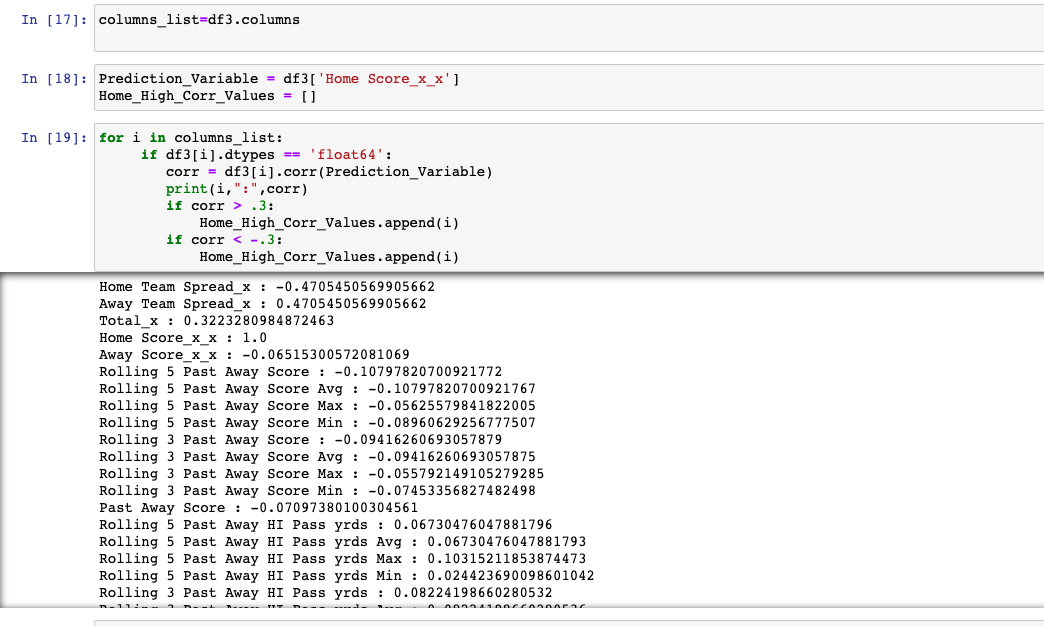

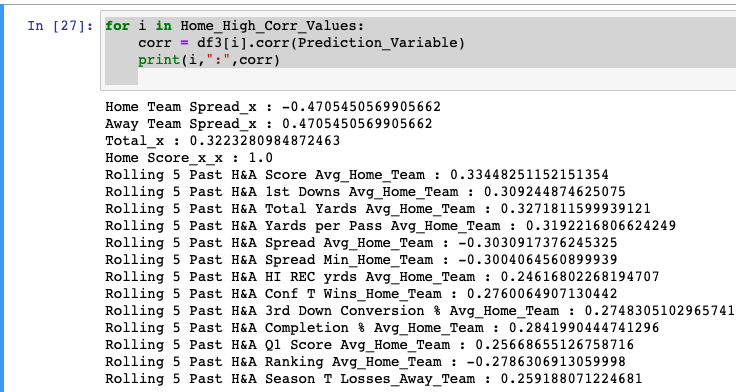

Added some additional columns that had slighltyl below .3 correlation values as well as added the same columns for away team stats

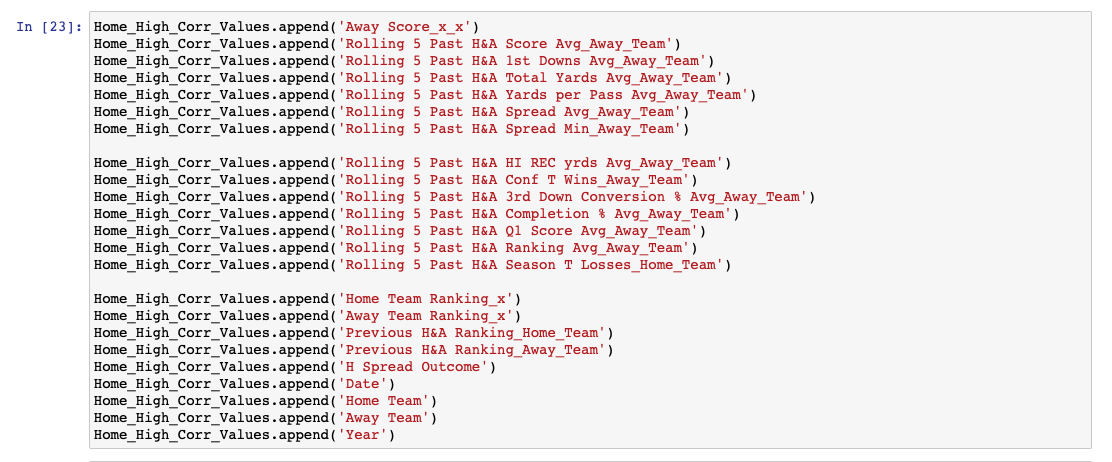

Looked at the distribution of team matchups within the dataset. The row represents home team and the columns represent the away team. e.g. Auburn had 8 Home games vs Arkansas and Arkansas had 9 Home games against Auburn.

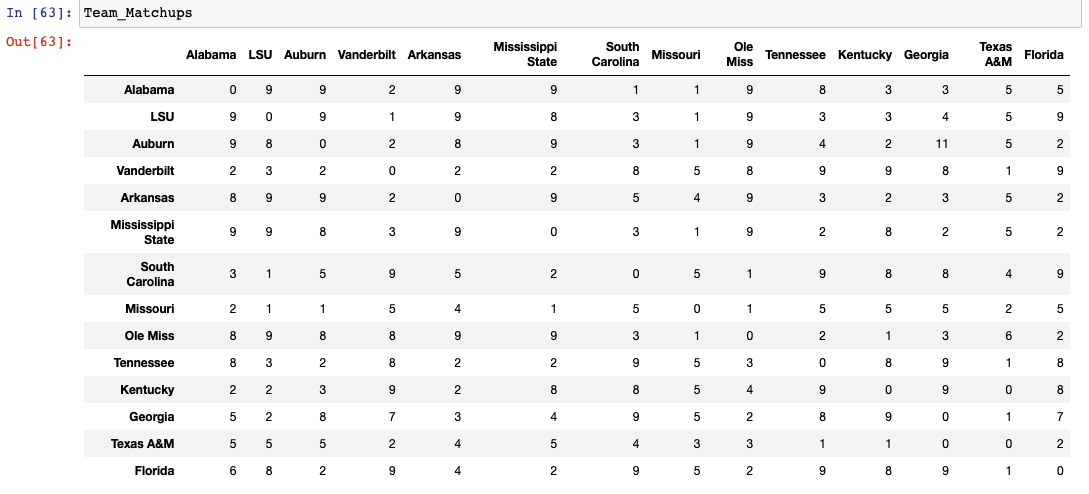

Decided to take the difference in stats between the home & away team individual stats to lessen the dimnesionality and provide the model with the columns that still contained information from both teams. The exceptions to this were Home Team Spread - as the away team spread is opposite the home team spread, Total_x - which is the total score betting line. 

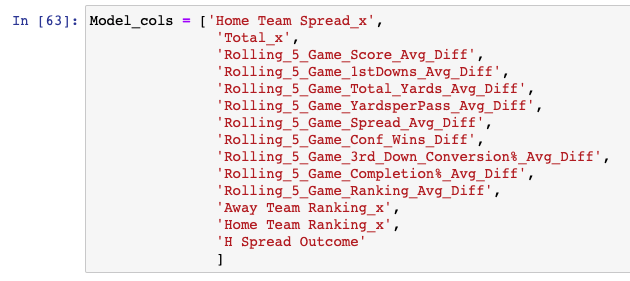

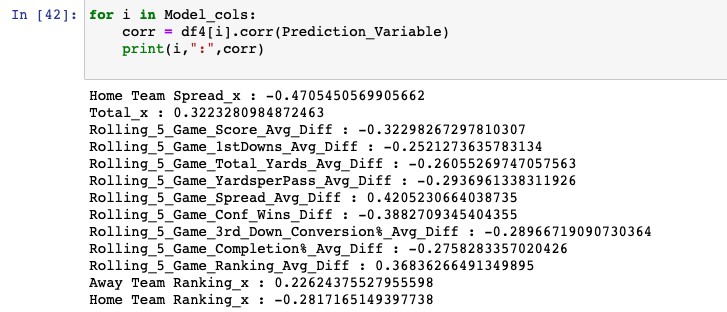

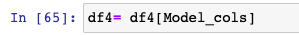

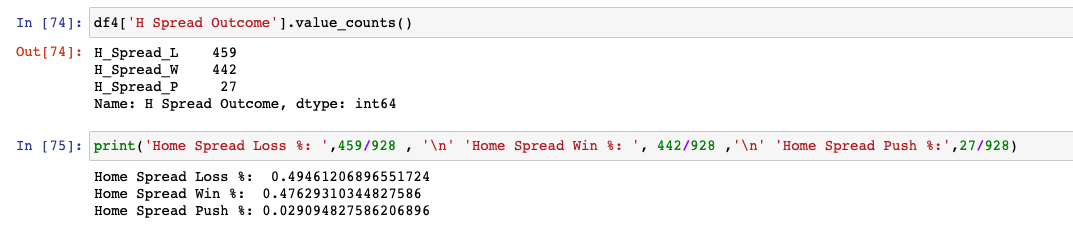

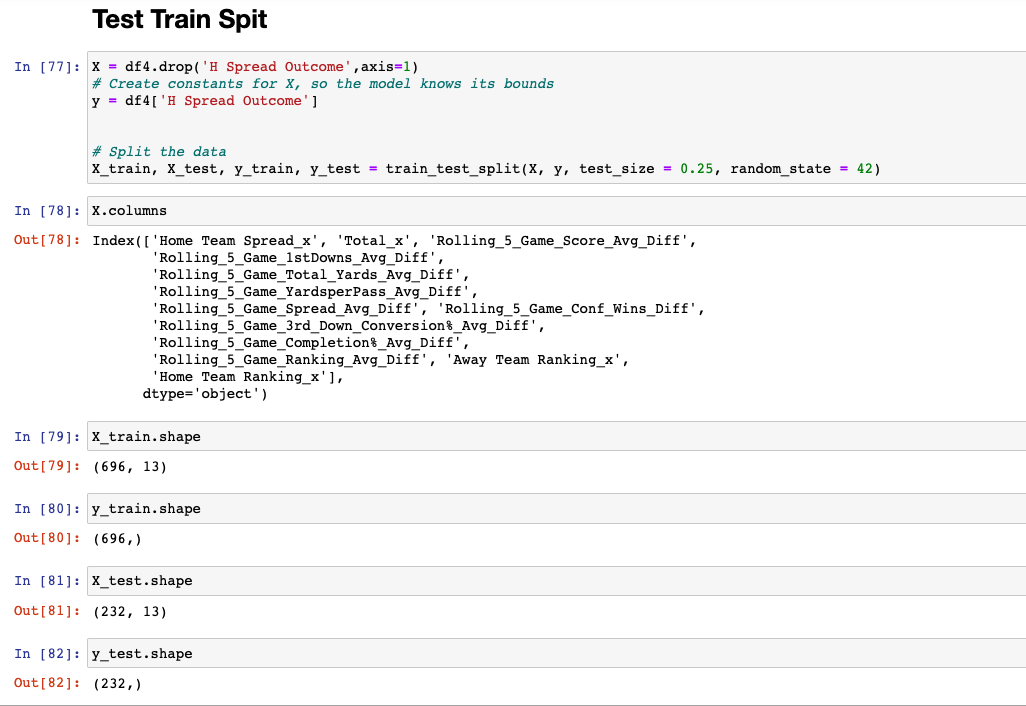

# Home Spread Outcome Modeling Using Differences in Stats

# Decision Tree

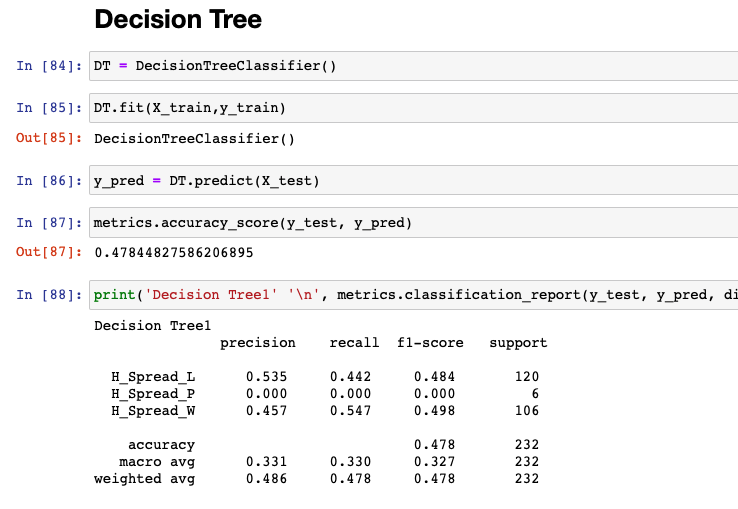

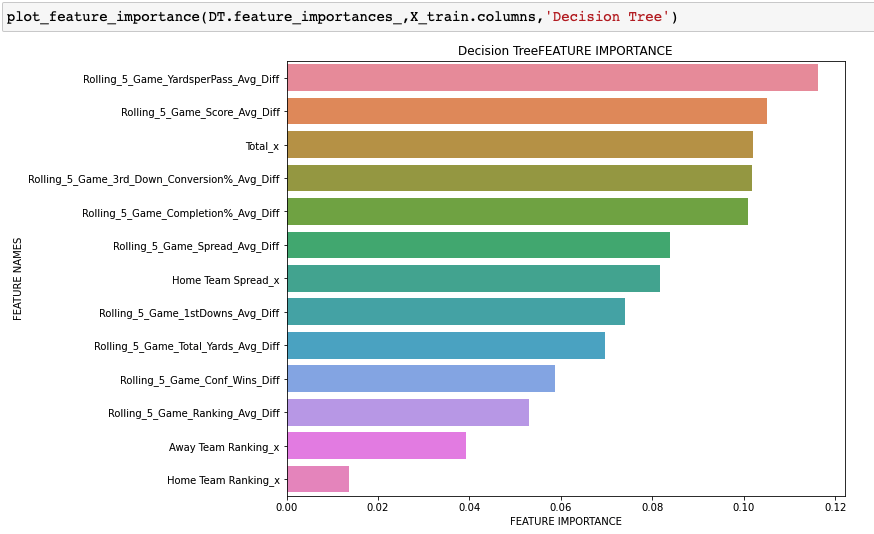

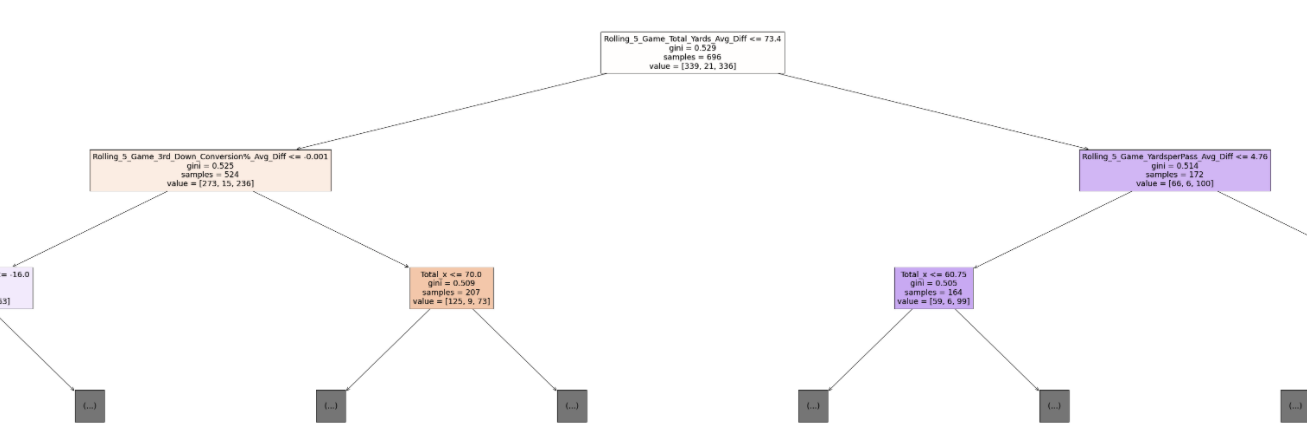

# Decision Tree2 - Parameter Tuning

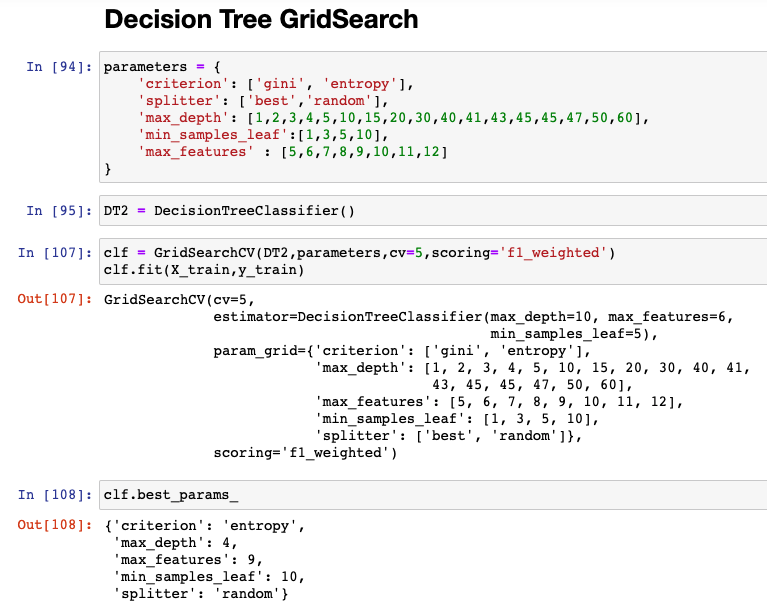

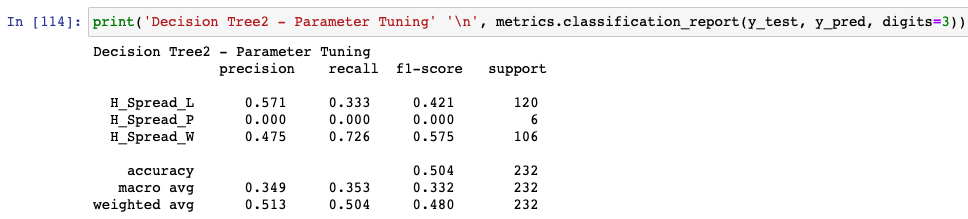

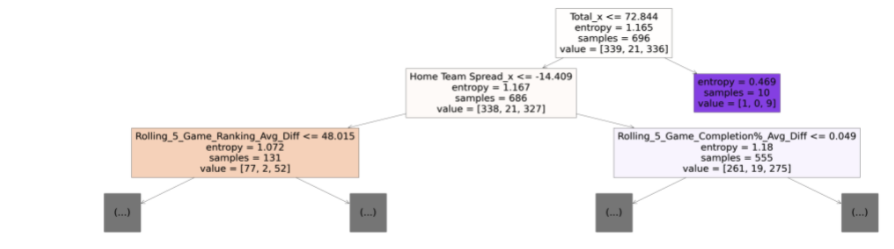

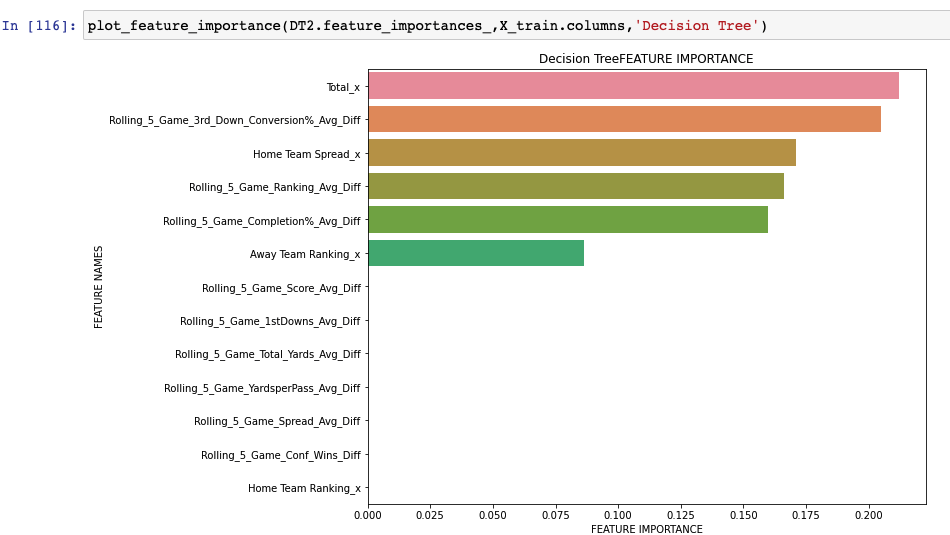

# Random Forest 

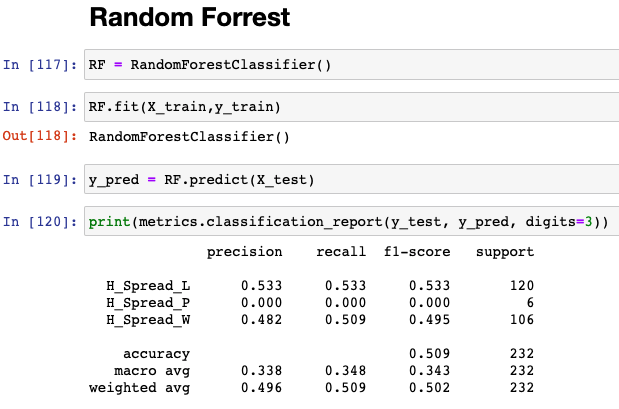

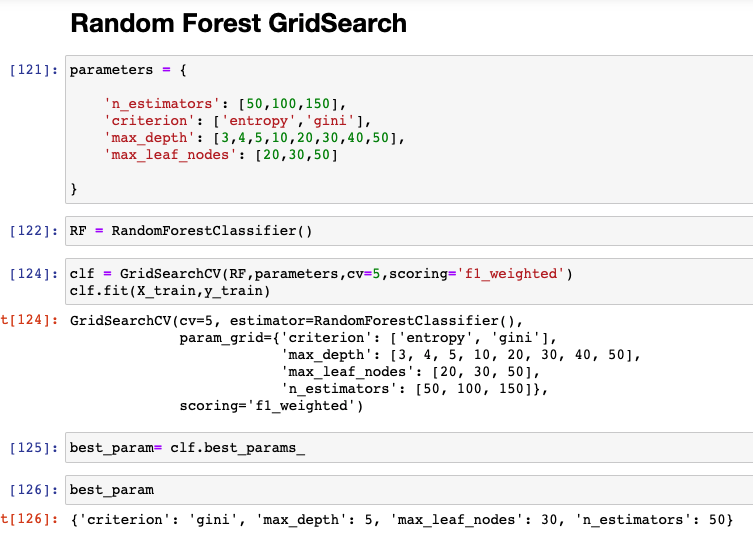

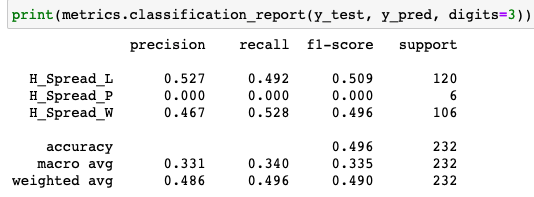

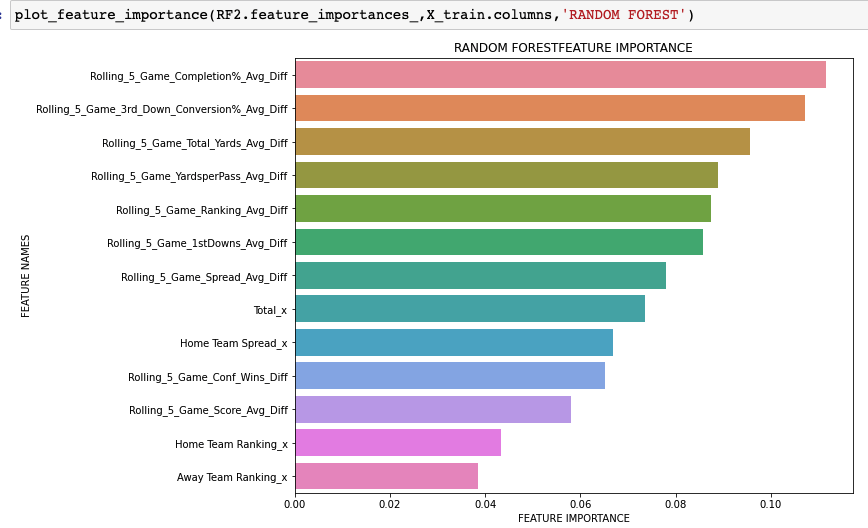

# KNN Model

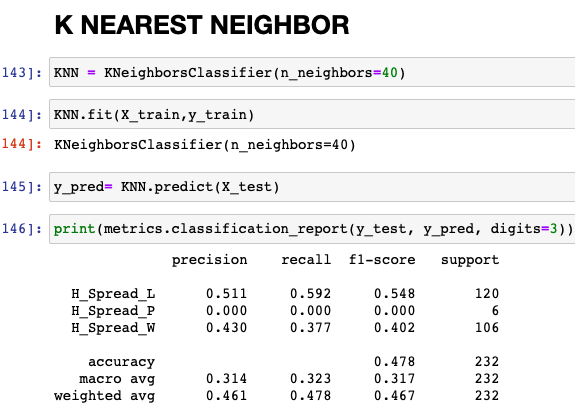

# KNN Parameter Tuning

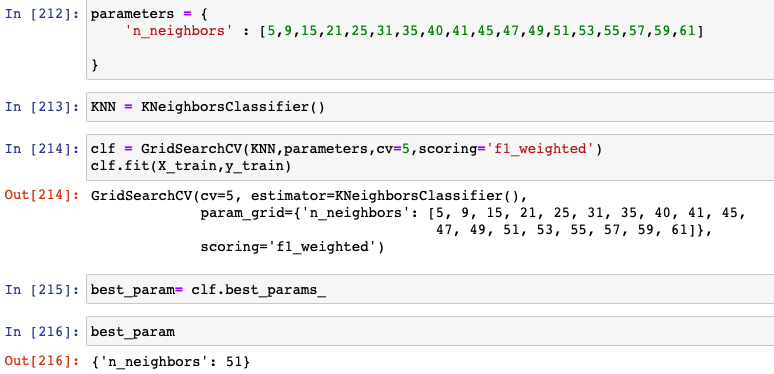

# Support Vector Machines Model 

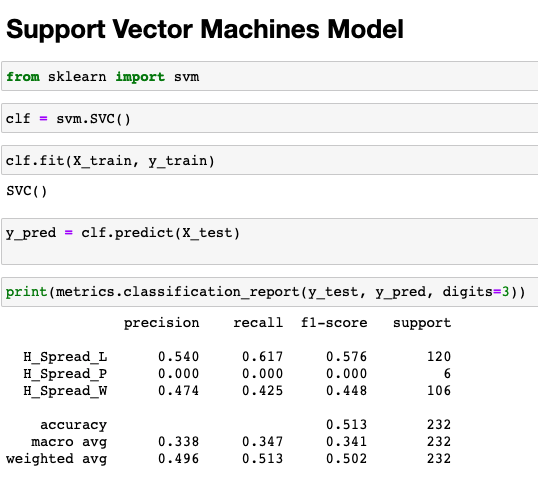

# Home / Away Winner Modeling Using Differences in Stats

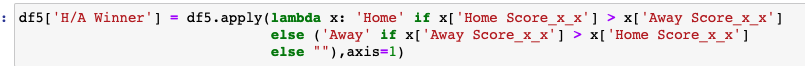

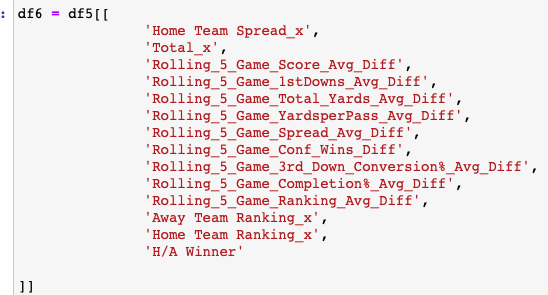

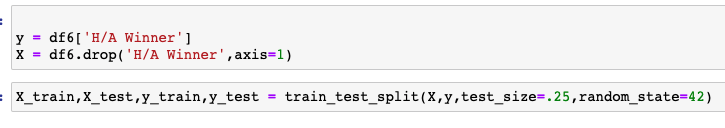

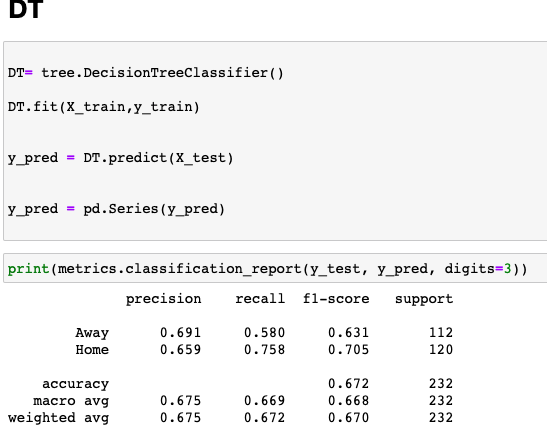

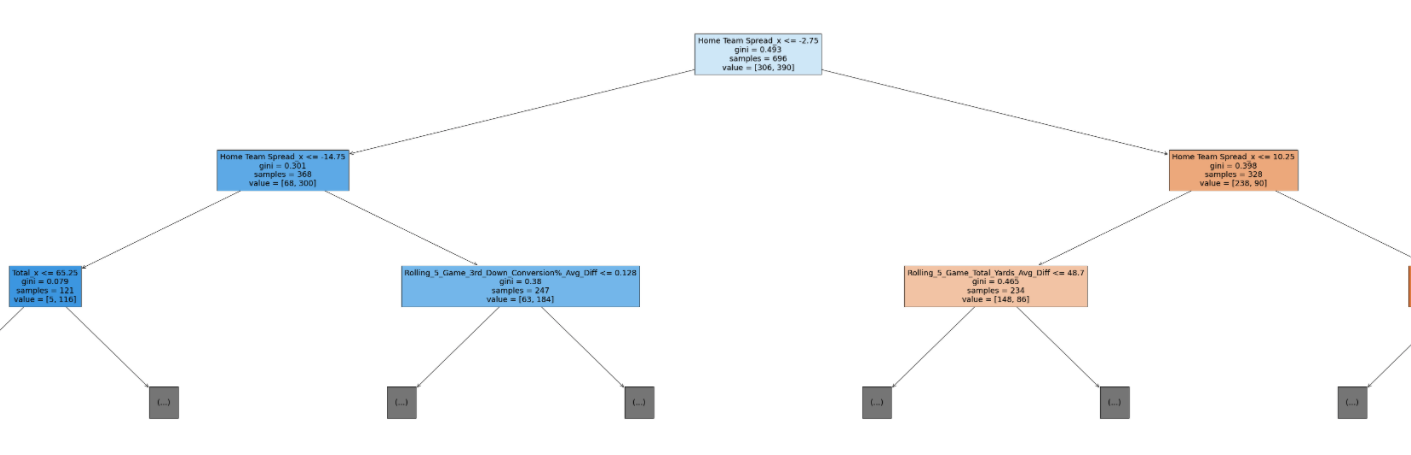

# DT - Parameter Tuning

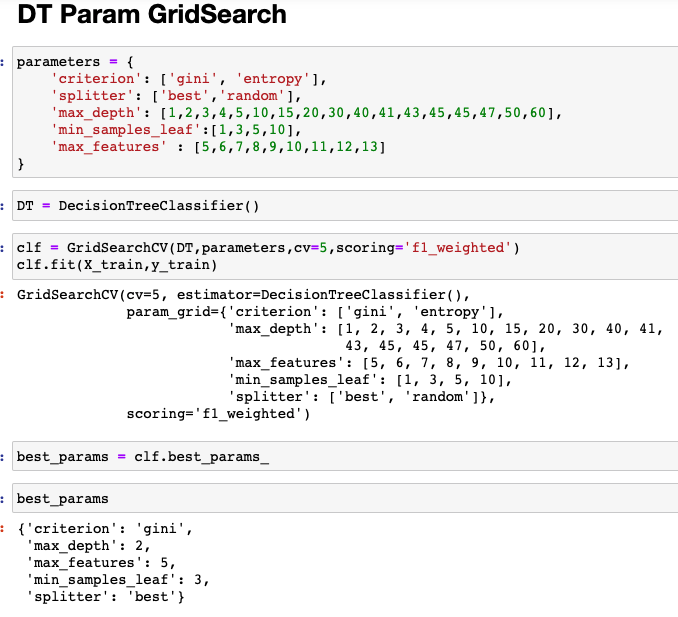

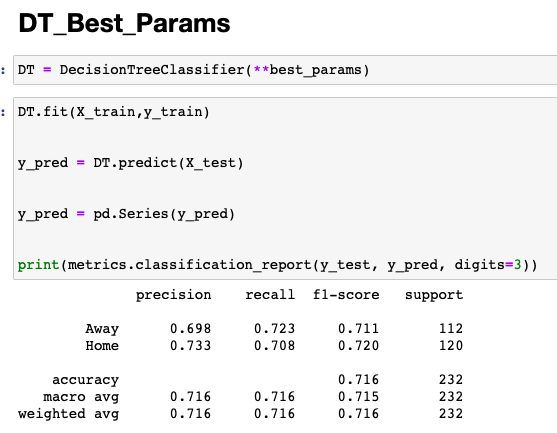

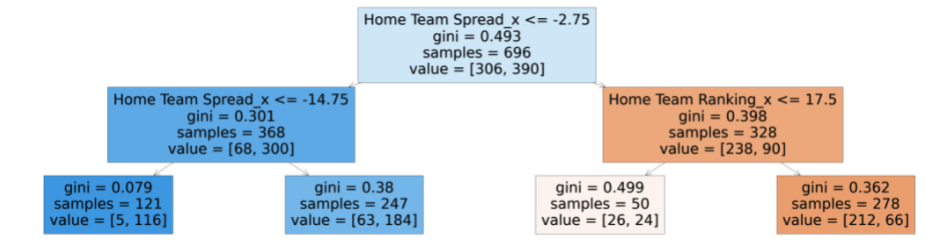

# Random Forest

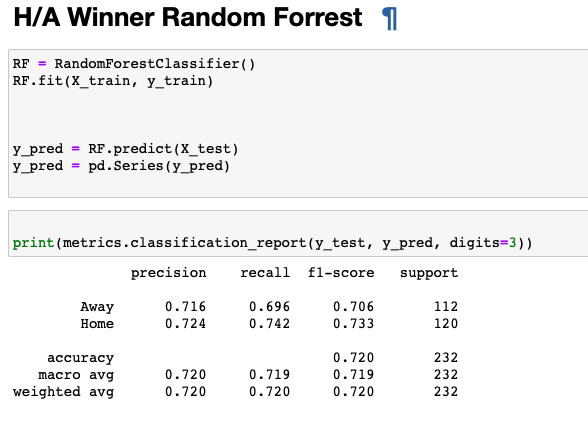

# Random Forest Parameter Tuning

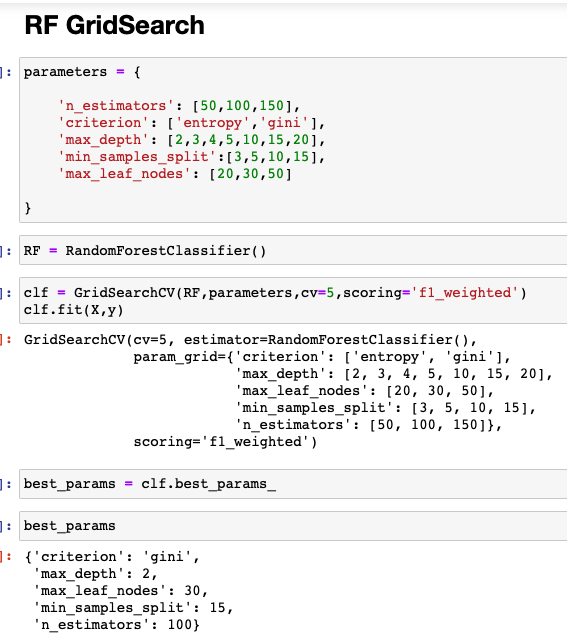

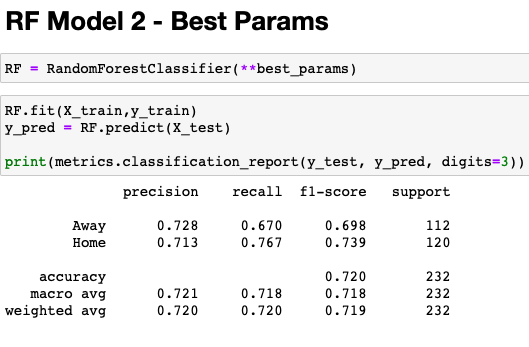

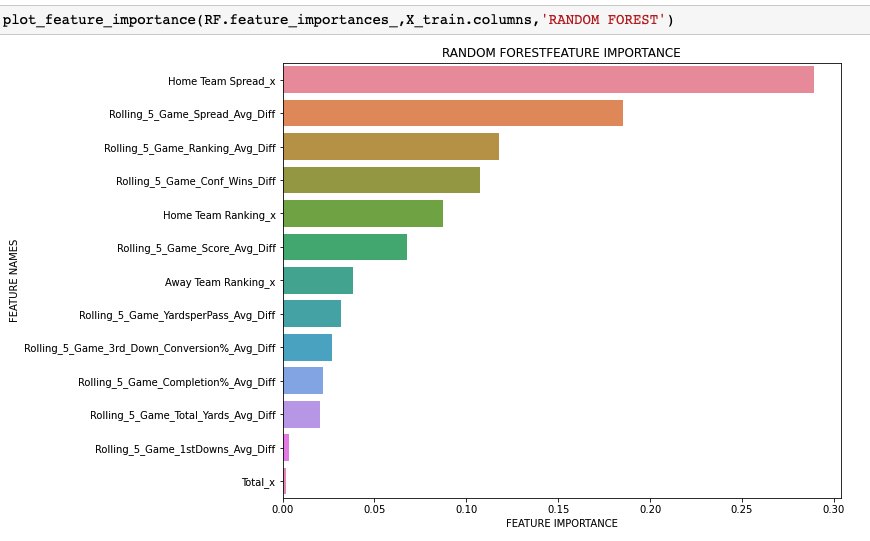

# KNN

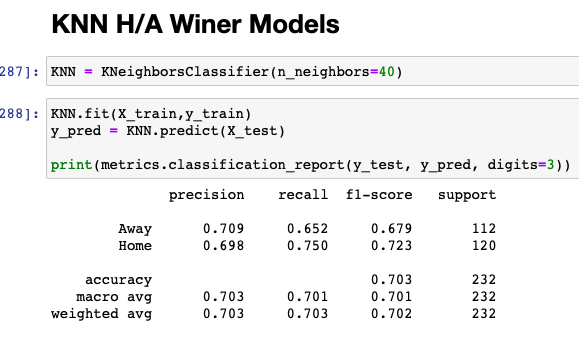

# KNN Parameter Tuning

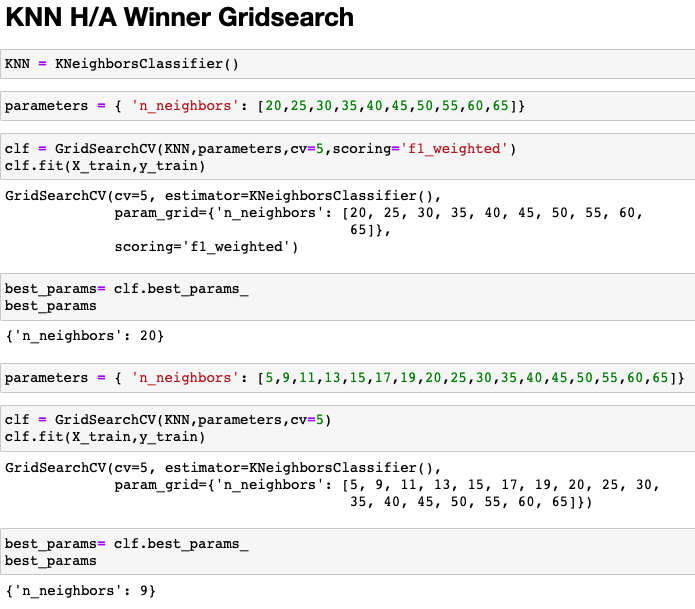

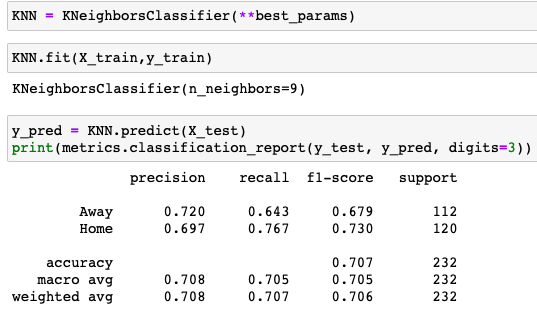

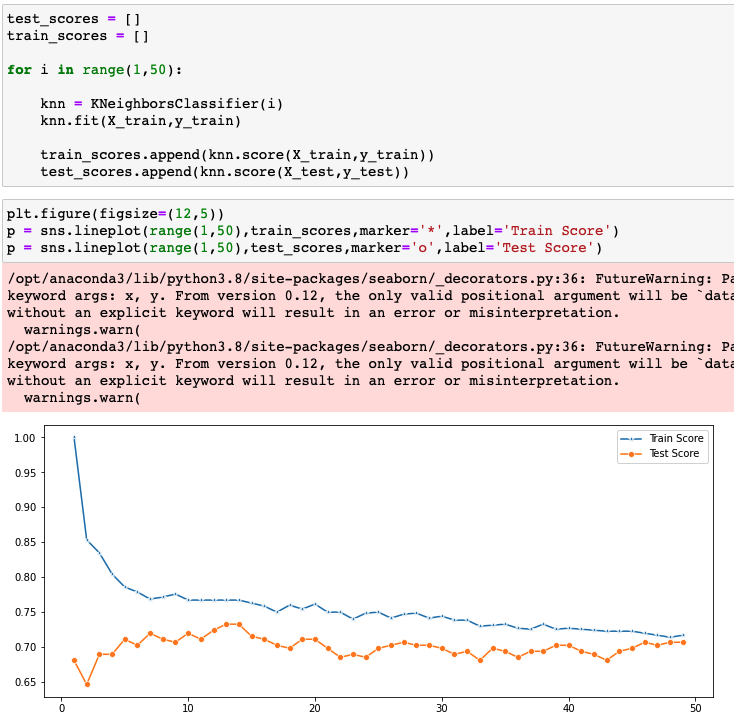

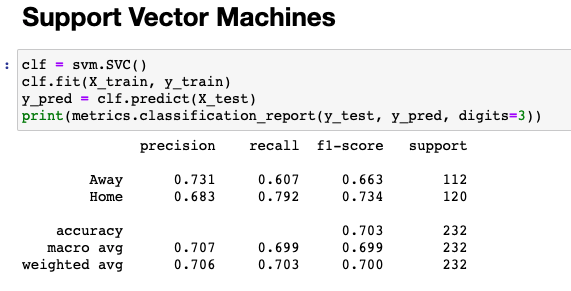

# Models using Home & Away Stats

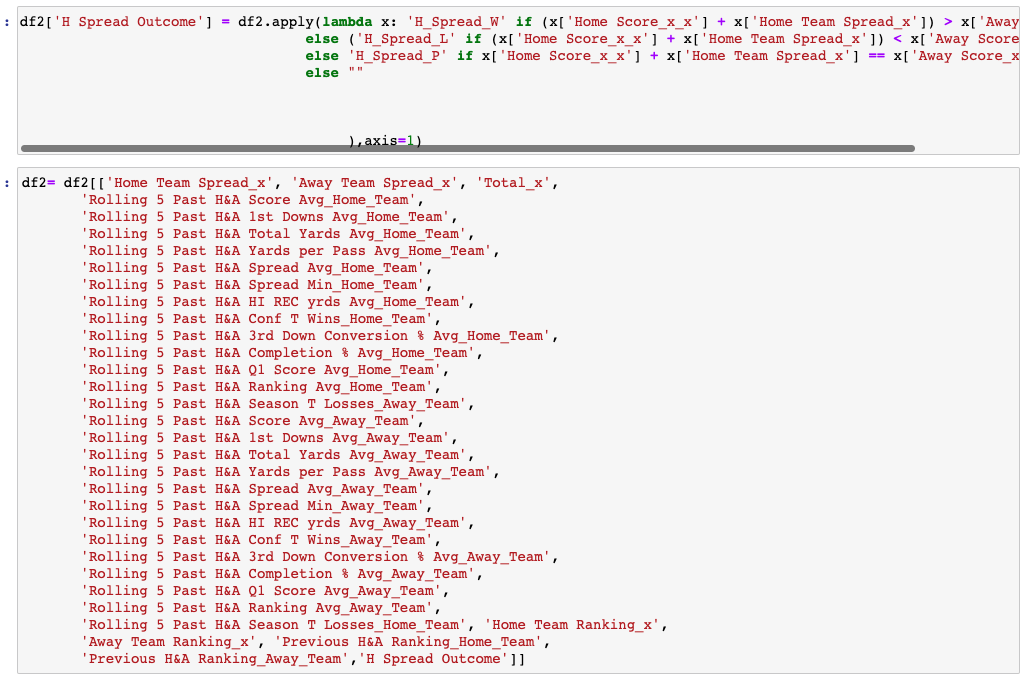

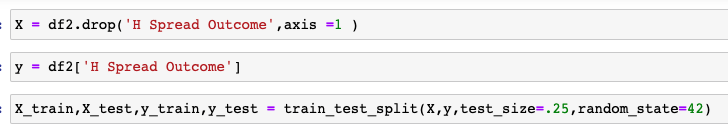

# KNN

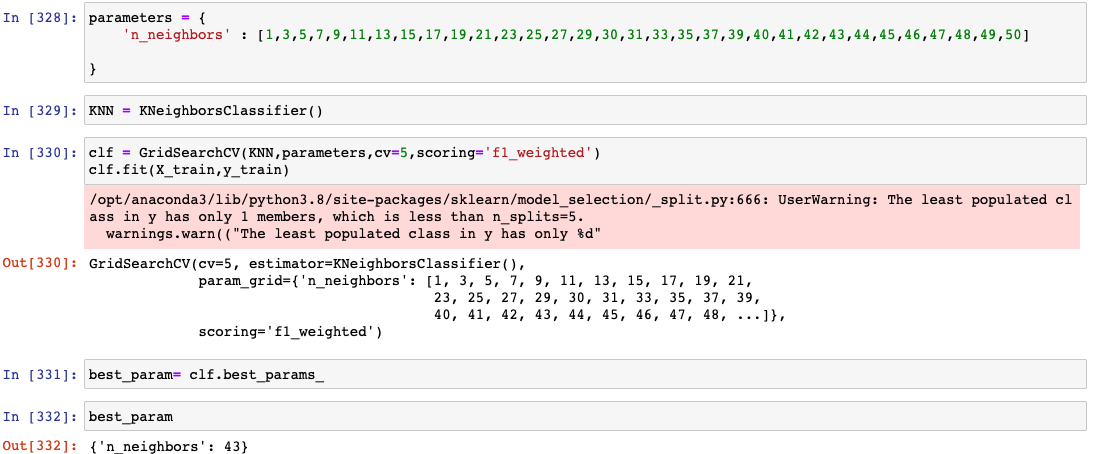

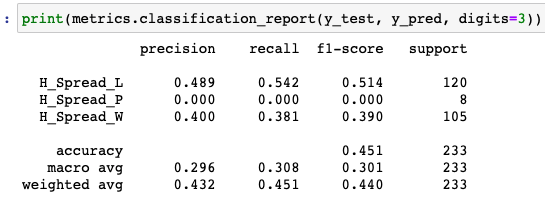

# Decision Tree

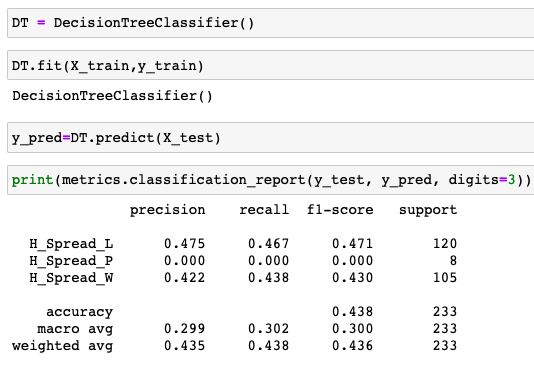

# Random Forest

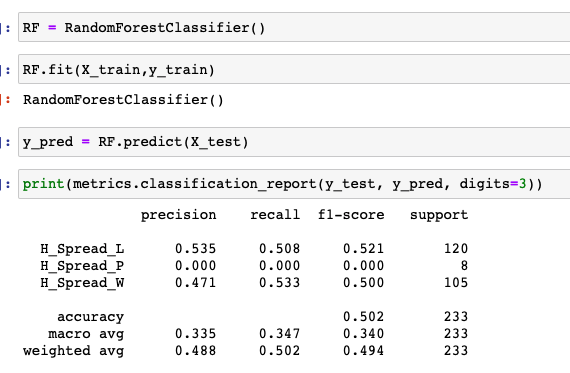

# Home/Away Winner Models

# KNN

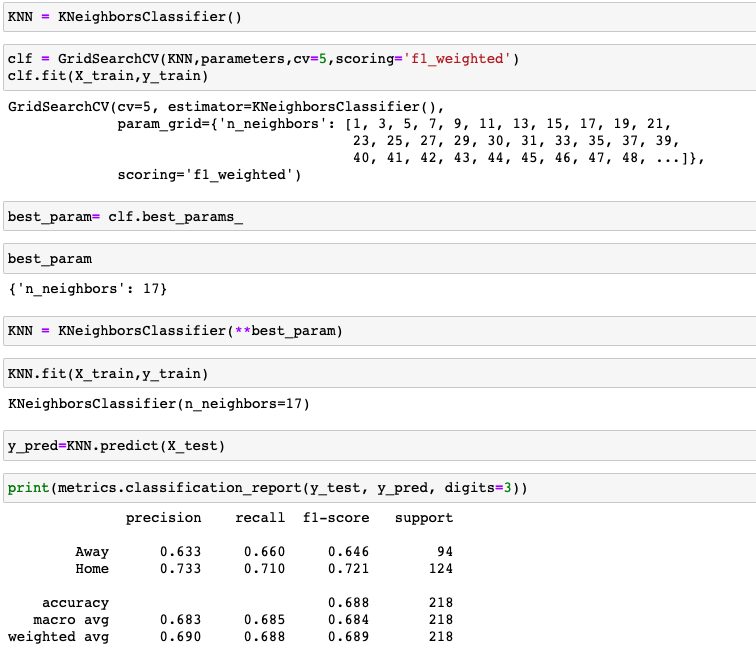

# Random Forest

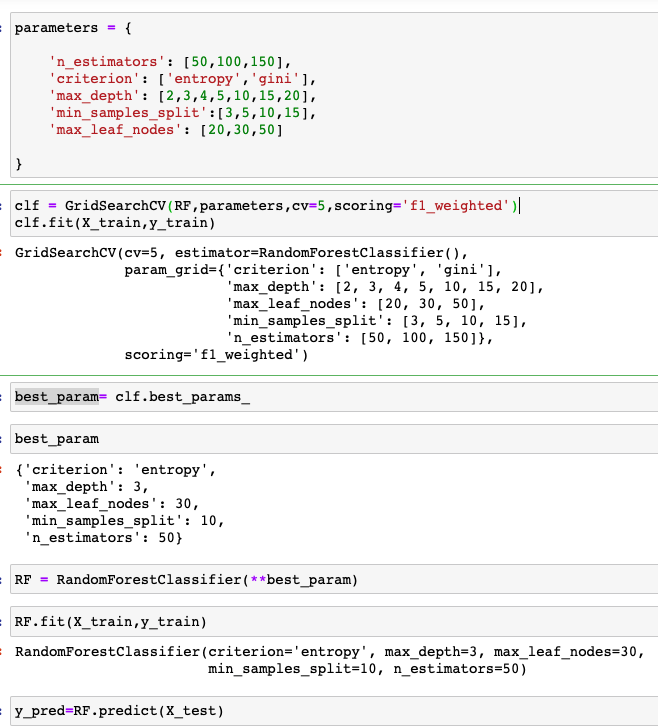

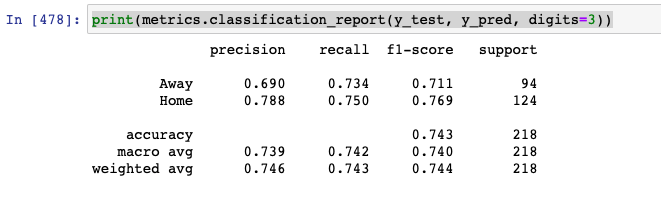

# Decision Tree

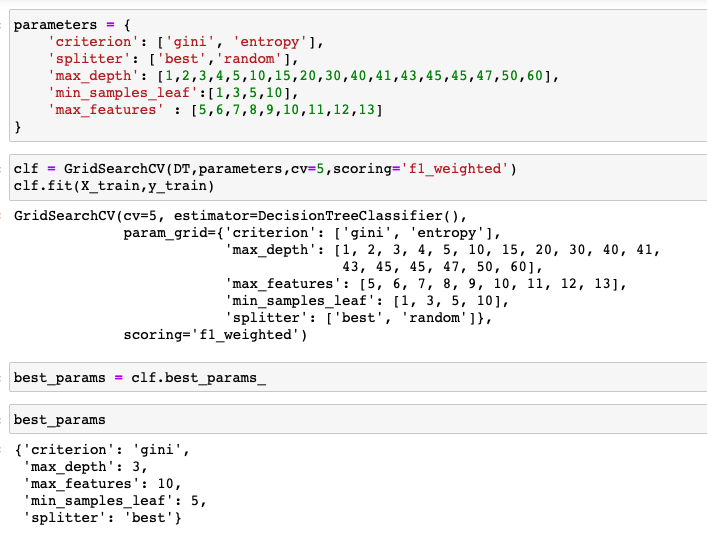

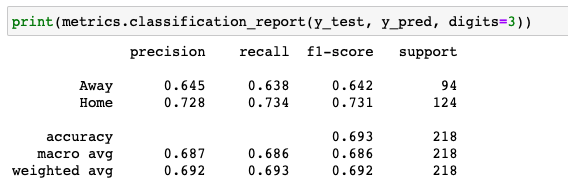

# Home Stats Models

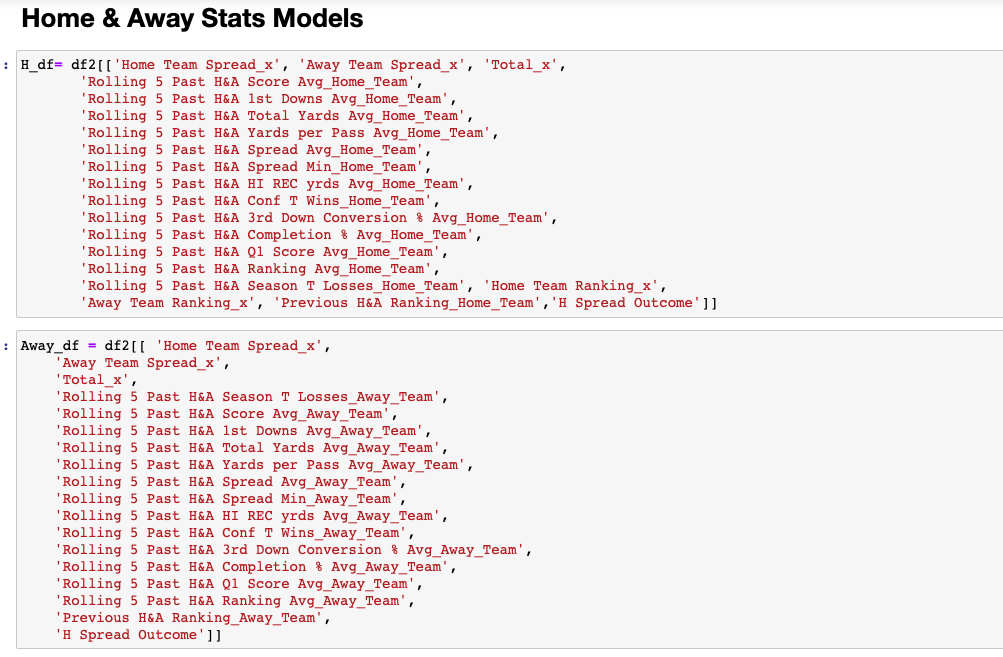

# KNN

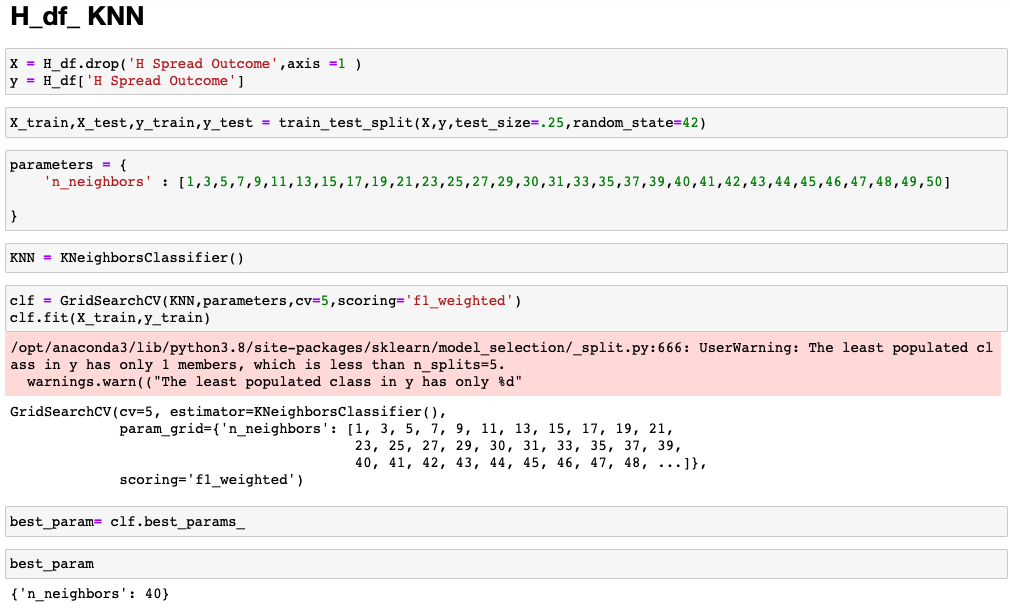

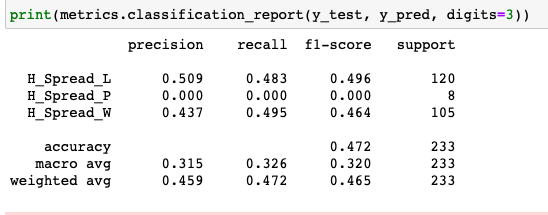

# Decision Tree

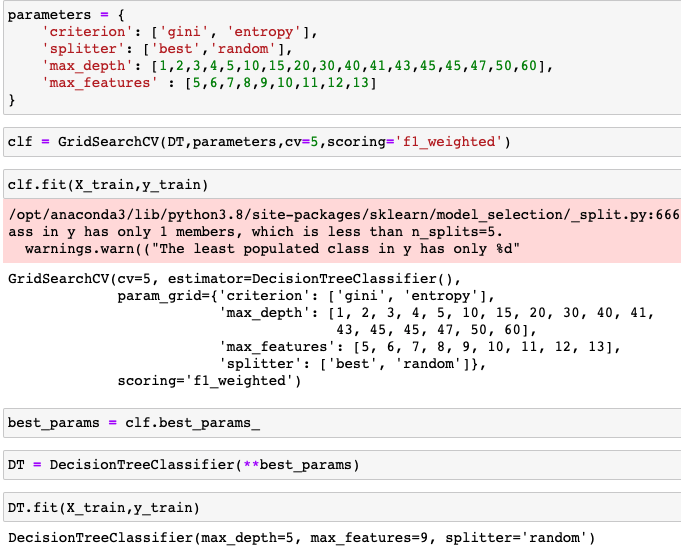

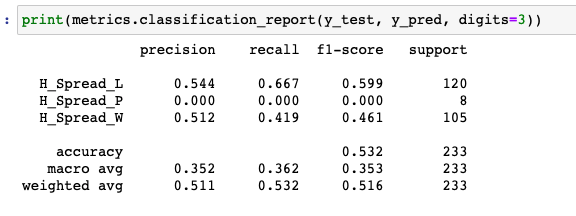

# Random Forest Model

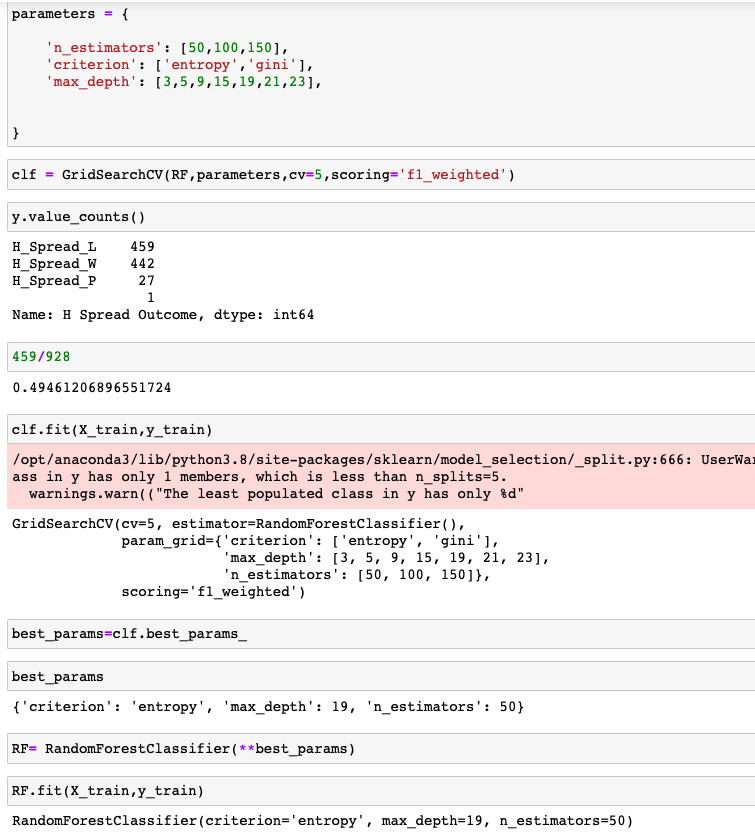

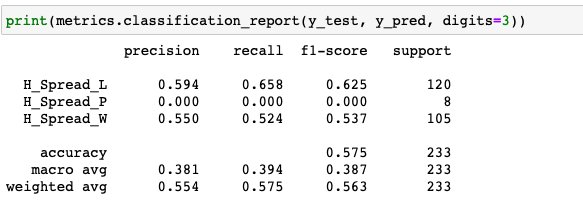

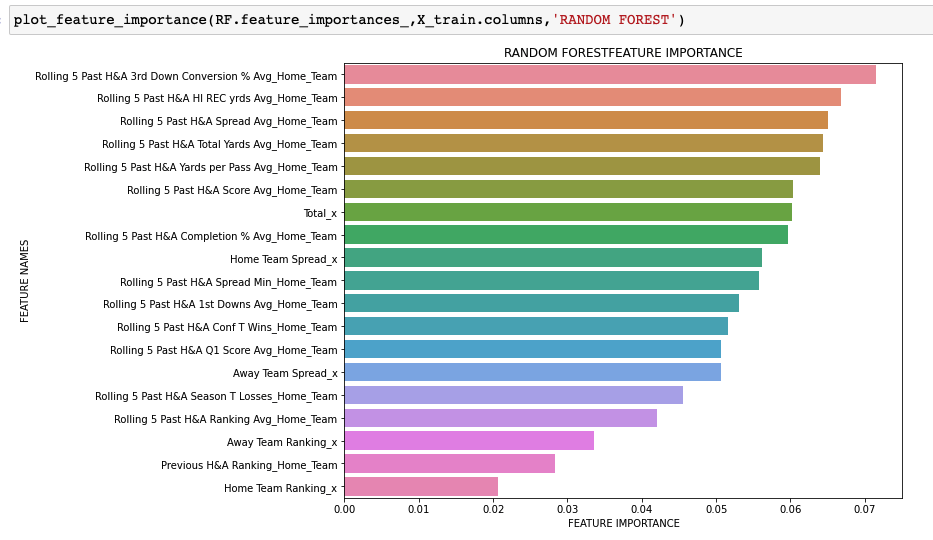

# Home/Away Winner

# KNN

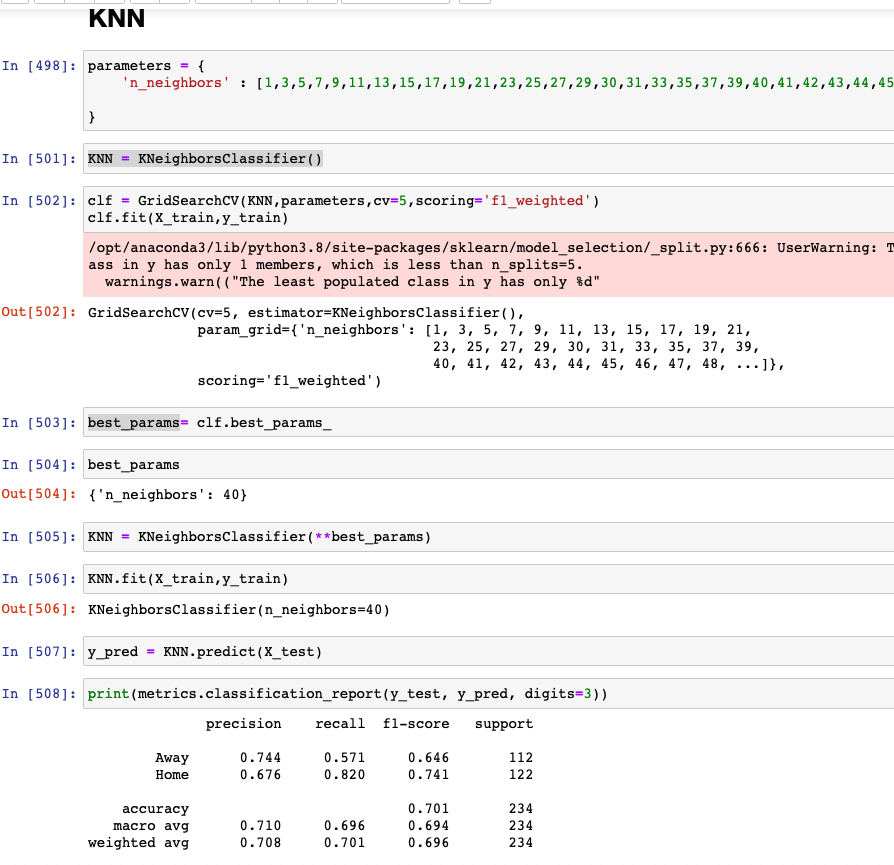

# Decision Tree

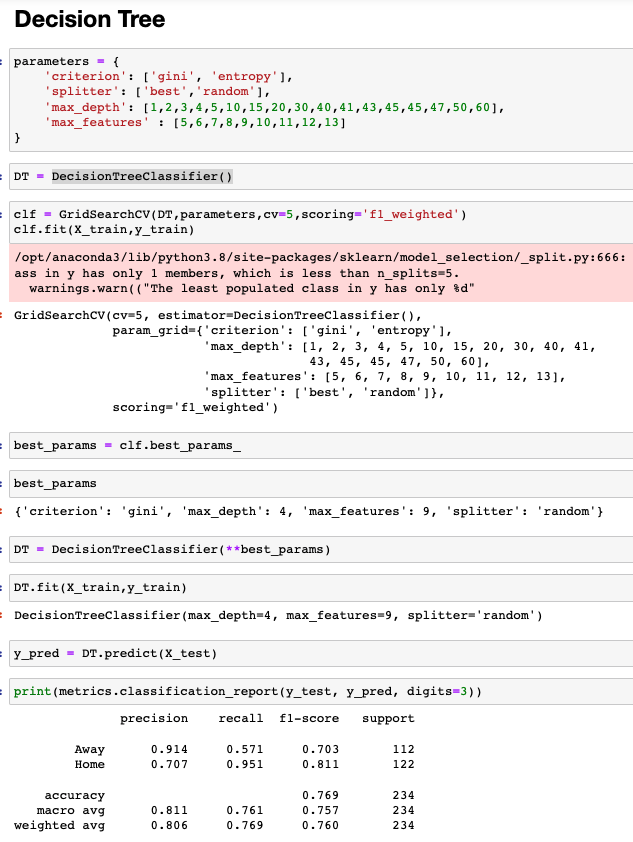

# Random Forest

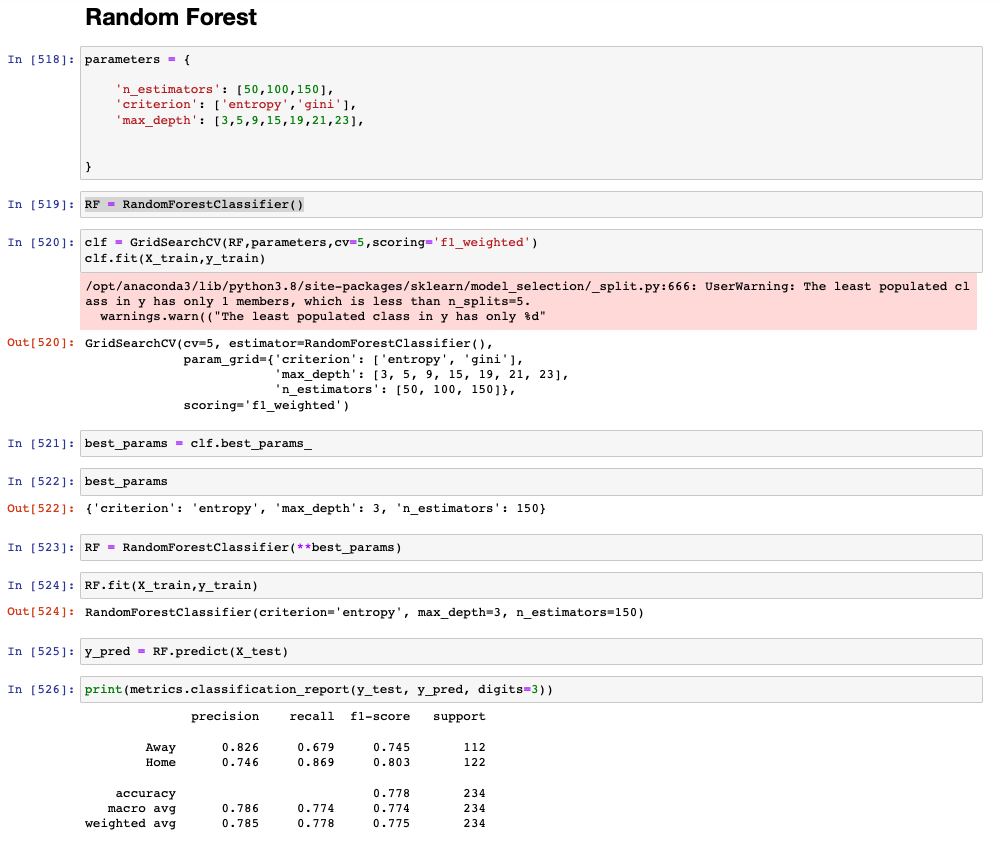

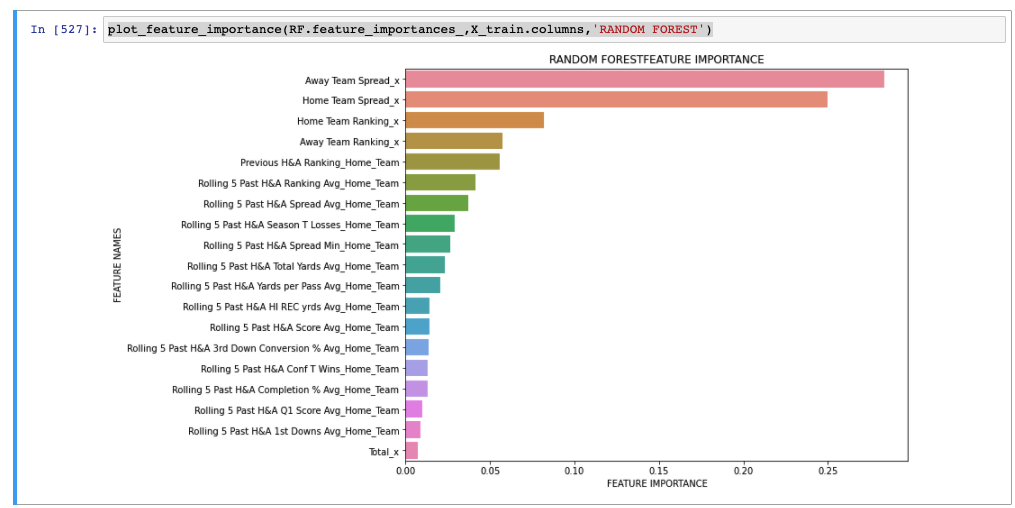

# Random Forest - Removed Spread

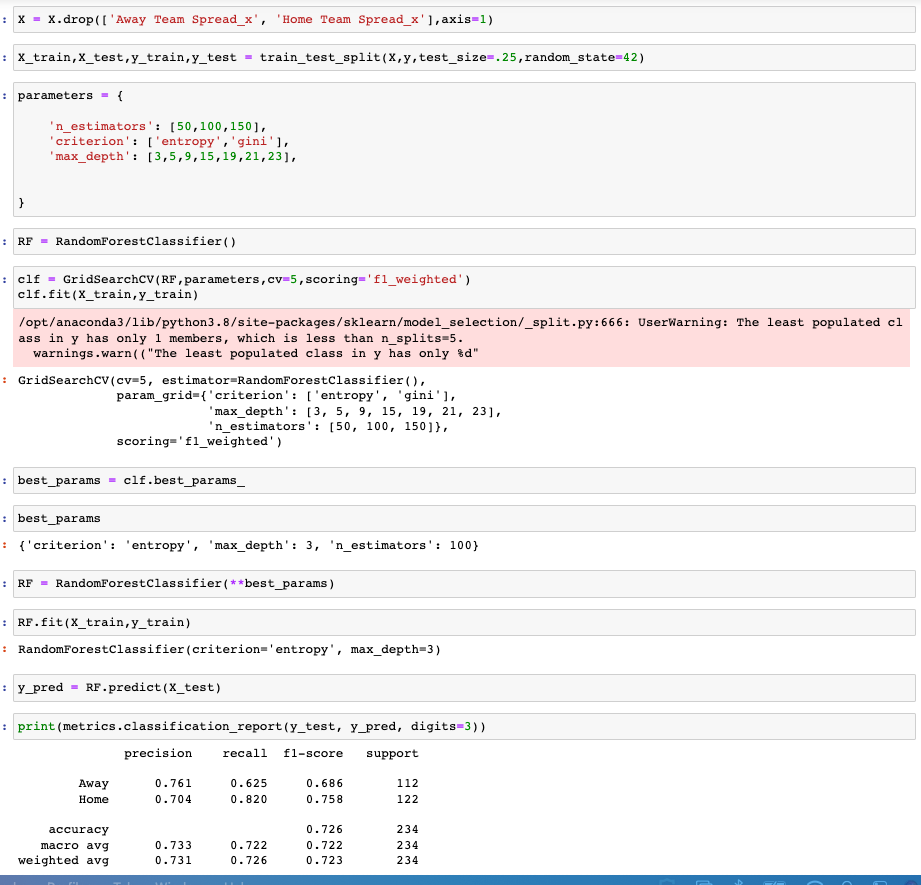

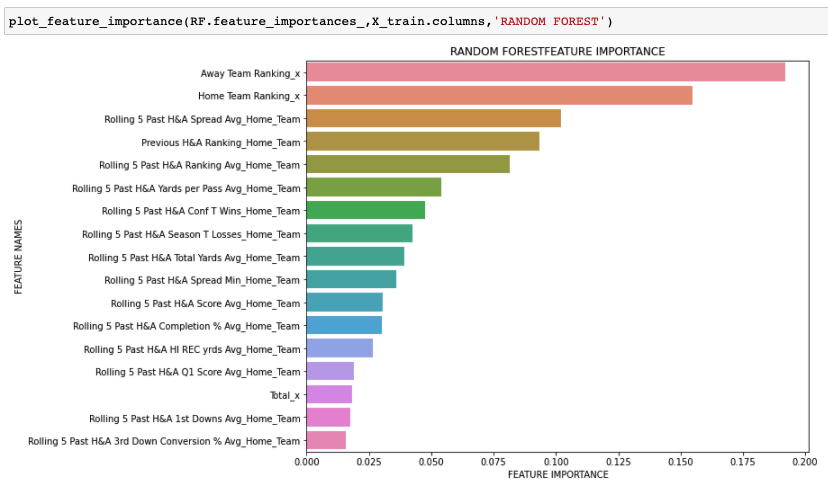

# Random Forest - Dropped remaining Ranking variables

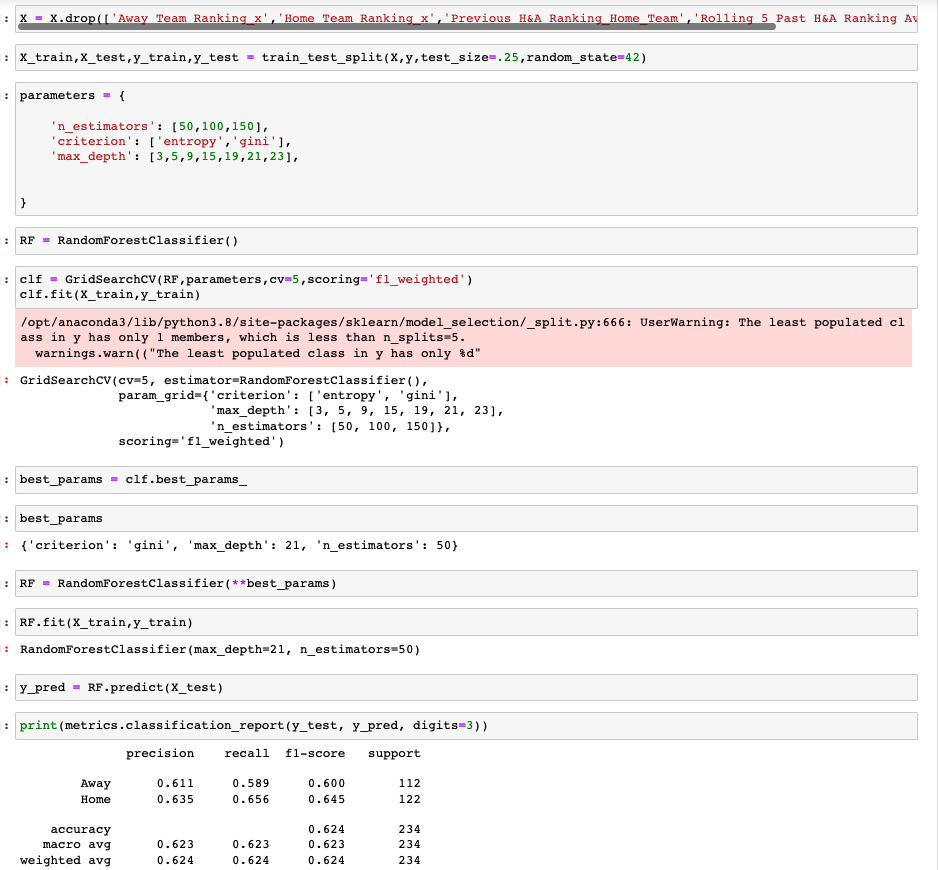

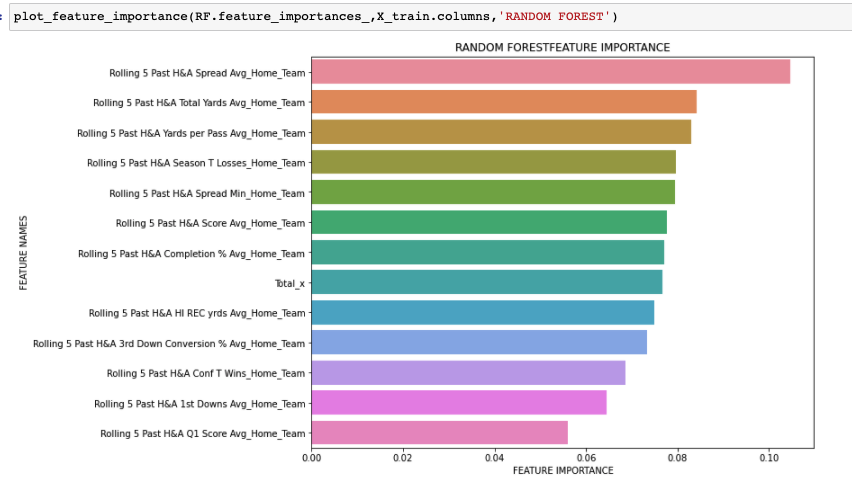

# Random Forest Dropped Remaining Spread Variables that are not Stat related 

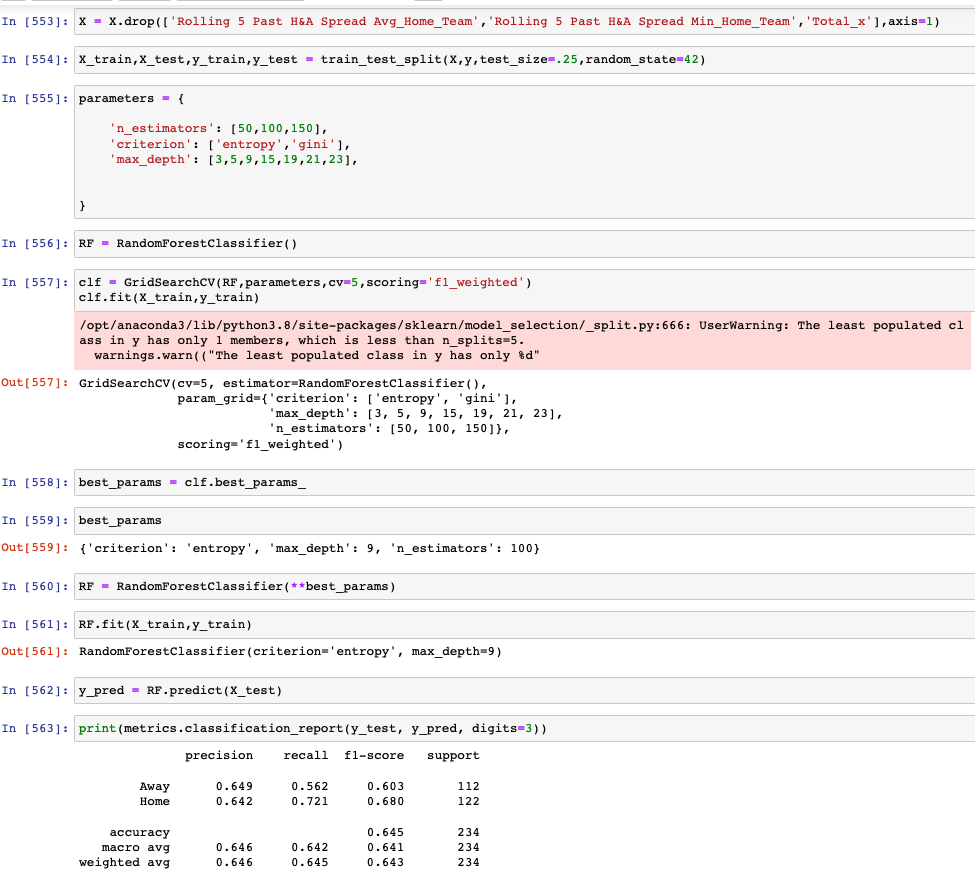

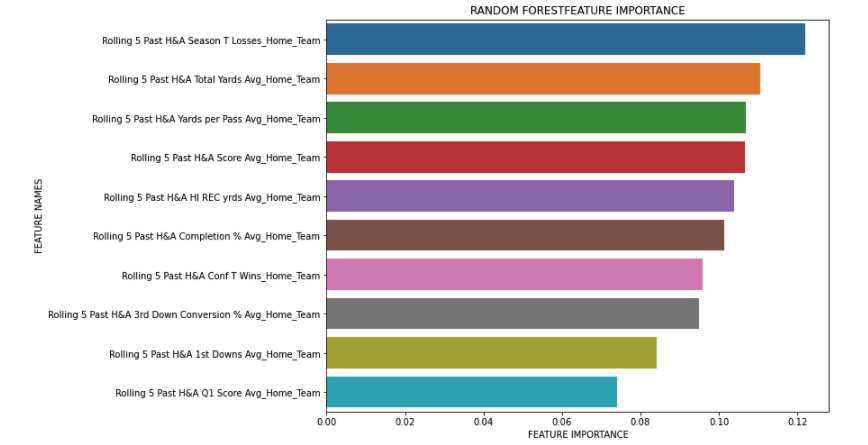